#### There are two types of Statistics:  
>Descriptive : Describe and summarize data  
>Inferential: Use a sample of data to make inferences about a larger population  


#### There are two types of Data  
>Numeric (Quantitative):  
>>Continues(measured)   
>>Discrete(counted)  

>Categorical (Qualitative)  
>>Nominal(unordered)  
>>Ordinal (ordered)  


# Measure of Center

#### Where is the center of the data?  
>Mean:   
>><code>import numpy as np
np.mean(x)</code>

>Median:  
>><code>import numpy as np
np.median(x)</code>

>Mode: most frequent value  
>><code> Msleep[‘sleep’].value_counts()  
    or      
import statistics
statistics.mode(x)</code>

In [2]:
import pandas as pd


This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length.

In [4]:
# the excel file has three headers, so it is multi-index header
urls = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/statistic/data/food_carbon_footprint_index_2018_nu3.csv'
df = pd.read_csv(urls,index_col = 0, header=[0,1,2])

In [5]:
df

,Unnamed: 1_level_0,Animal Products,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,...,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Difference between Animal Products /person/year and Non-Animal Products\n/person/year in kg,Unnamed: 27_level_0
,Unnamed: 1_level_1,Pork,Unnamed: 3_level_1,Poultry,Unnamed: 5_level_1,Beef,Unnamed: 7_level_1,Lamb & Goat,Unnamed: 9_level_1,Fish,...,Unnamed: 18_level_1,Rice,Unnamed: 20_level_1,Soybeans,Unnamed: 22_level_1,Nuts inc. Peanut Butter,Unnamed: 24_level_1,Total Kg CO2/year/person,Unnamed: 26_level_1,Unnamed: 27_level_1
#,Country,Supplied for Consumption (kg/person/year),Kg CO2/person/year,Supplied for Consumption (kg/person/year),Kg CO2/person/year,Supplied for Consumption (kg/person/year),Kg CO2/person/year,Supplied for Consumption (kg/person/year),Kg CO2/person/year,Supplied for Consumption (kg/person/year),...,Kg CO2/person/year,Supplied for Consumption (kg/person/year),Kg CO2/person/year,Supplied for Consumption (kg/person/year),Kg CO2/person/year,Supplied for Consumption (kg/person/year),Kg CO2/person/year,Unnamed: 25_level_2,Unnamed: 26_level_2,Unnamed: 27_level_2
1,Argentina,10.51,37.20,38.66,41.53,55.48,1712.00,1.56,54.63,4.36,...,19.66,8.77,11.22,0.00,0.00,0.49,0.87,31.75,2108.90,NaN
2,Australia,24.14,85.44,46.12,49.54,33.86,1044.85,9.87,345.65,17.69,...,13.44,11.03,14.12,0.19,0.09,8.73,15.45,43.10,1852.46,NaN
3,Albania,10.88,38.51,13.23,14.21,22.50,694.30,15.32,536.50,3.85,...,26.44,7.78,9.96,0.00,0.00,4.36,7.72,44.12,1689.61,NaN
4,Iceland,21.69,76.77,26.87,28.86,13.36,412.26,21.12,739.62,74.41,...,13.91,3.89,4.98,0.11,0.05,3.88,6.87,25.81,1679.74,NaN
5,New Zealand,22.29,78.90,34.98,37.58,22.49,693.99,18.91,662.23,20.36,...,14.67,9.16,11.72,0.44,0.20,8.22,14.55,41.14,1668.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Sri Lanka,0.05,0.18,4.96,5.33,1.38,42.58,0.09,3.15,24.92,...,7.06,109.72,140.41,0.00,0.00,1.09,1.93,149.40,-4.34,NaN
128,Indonesia,2.98,10.55,7.50,8.06,2.59,79.92,0.46,16.11,25.65,...,4.85,134.62,172.27,1.12,0.50,4.92,8.71,186.33,-5.15,NaN


In [4]:
# lets delet the last row with '© 2018 nu3\nFull study: https://www.nu3.com/c/food-carbon-footprint-index-2018/'index

## some cleaning

In [5]:
df = df.drop('© 2018 nu3\nFull study: https://www.nu3.com/c/food-carbon-footprint-index-2018/')

In [6]:
df

Unnamed: 1_level_0                           Animal Products  \
    Unnamed: 1_level_1                                      Pork   
#              Country Supplied for Consumption (kg/person/year)   
1            Argentina                                     10.51   
2            Australia                                     24.14   
3              Albania                                     10.88   
4              Iceland                                     21.69   
5          New Zealand                                     22.29   
..                 ...                                       ...   
126       Sierra Leone                                      1.22   
127          Sri Lanka                                      0.05   
128          Indonesia                                      2.98   
129            Liberia                                      4.01   
130         Bangladesh                                      0.00   

                                                                  \
                                                         Poultry   
#   Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1                37.20                                     38.66   
2                85.44                                     46.12   
3                38.51                                     13.23   
4                76.77                                     26.87   
5                78.90                                     34.98   
..                 ...                                       ...   
126               4.32                                      4.97   
127               0.18                                      4.96   
128              10.55                                      7.50   
129              14.19                                      8.91   
130               0.00                                      1.40   

                                                                  \
                                                            Beef   
#   Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1                41.53                                     55.48   
2                49.54                                     33.86   
3                14.21                                     22.50   
4                28.86                                     13.36   
5                37.58                                     22.49   
..                 ...                                       ...   
126               5.34                                      1.99   
127               5.33                                      1.38   
128               8.06                                      2.59   
129               9.57                                      0.78   
130               1.50                                      1.28   

                                                                  \
                                                     Lamb & Goat   
#   Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1              1712.00                                      1.56   
2              1044.85                                      9.87   
3               694.30                                     15.32   
4               412.26                                     21.12   
5               693.99                                     18.91   
..                 ...                                       ...   
126              61.41                                      0.65   
127              42.58                                      0.09   
128              79.92                                      0.46   
129              24.07                                      0.48   
130              39.50                                      1.33   

                                                                  ...  \
                                                            Fish  ...   
#   Kg CO2/person/year Supplied for Consumptio

### lets make a cleaner dataframe
- clear the first level of columns name
- clear two last columns (Total Kg CO2/year/person	Unnamed: 26_level_1)
- melt the dataframe in a way that the seconed level of the multiindex column name is considered as a column and so to have 'Country', 'food_category', 'kind', 'value' as the columns
-  extract two data frame for df_consumption and df_co2 change their value column name for the first one as consumption and the other one co2 and drop the kind columns
- then join the two data frames

In [6]:
# clear the first level of columns name
df=df.droplevel(0, axis=1) 

In [7]:
df.head()

Unnamed: 1_level_1                                      Pork  \
#            Country Supplied for Consumption (kg/person/year)   
1          Argentina                                     10.51   
2          Australia                                     24.14   
3            Albania                                     10.88   
4            Iceland                                     21.69   
5        New Zealand                                     22.29   

                                                       Poultry  \
# Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1              37.20                                     38.66   
2              85.44                                     46.12   
3              38.51                                     13.23   
4              76.77                                     26.87   
5              78.90                                     34.98   

                                                          Beef  \
# Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1              41.53                                     55.48   
2              49.54                                     33.86   
3              14.21                                     22.50   
4              28.86                                     13.36   
5              37.58                                     22.49   

                                                   Lamb & Goat  \
# Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1            1712.00                                      1.56   
2            1044.85                                      9.87   
3             694.30                                     15.32   
4             412.26                                     21.12   
5             693.99                                     18.91   

                                                          Fish  ...  \
# Kg CO2/person/year Supplied for Consumption (kg/person/year)  ...   
1              54.63                                      4.36  ...   
2             345.65                                     17.69  ...   
3             536.50                                      3.85  ...   
4             739.62                                     74.41  ...   
5             662.23                                     20.36  ...   

                     Wheat & Wheat Products                     \
# Supplied for Consumption (kg/person/year) Kg CO2/person/year   
1                                    103.11              19.66   
2                                     70.46              13.44   
3                                    138.64              26.44   
4                                     72.92              13.91   
5                                     76.91              14.67   

                                       Rice                     \
# Supplied for Consumption (kg/person/year) Kg CO2/person/year   
1                                      8.77              11.22   
2                                     11.03              14.12   
3                                      7.78               9.96   
4                                      3.89               4.98   
5                                      9.16              11.72   

                                   Soybeans                     \
# Supplied for Consumption (kg/person/year) Kg CO2/person/year   
1                                      0.00               0.00   
2                                      0.19               0.09   
3                                      0.00               0.00   
4                                      0.11               0.05   
5                                      0.44               0.20   

                    Nuts inc. Peanut Butter                     \
# Supplied for Consumption (kg/person/year) Kg CO2/person/year   
1                                      0.49               0.87   
2                                      8.73              15.45   

In [8]:
# clear two last columns (Total Kg CO2/year/person	Unnamed: 26_level_1)
df = df.drop(['Total Kg CO2/year/person','Unnamed: 26_level_1'], axis = 1)

C:\Users\nafis\AppData\Local\Temp\ipykernel_22108\3451769508.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Total Kg CO2/year/person','Unnamed: 26_level_1'], axis = 1)


In [9]:
df.head()

Unnamed: 1_level_1                                      Pork  \
#            Country Supplied for Consumption (kg/person/year)   
1          Argentina                                     10.51   
2          Australia                                     24.14   
3            Albania                                     10.88   
4            Iceland                                     21.69   
5        New Zealand                                     22.29   

                                                       Poultry  \
# Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1              37.20                                     38.66   
2              85.44                                     46.12   
3              38.51                                     13.23   
4              76.77                                     26.87   
5              78.90                                     34.98   

                                                          Beef  \
# Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1              41.53                                     55.48   
2              49.54                                     33.86   
3              14.21                                     22.50   
4              28.86                                     13.36   
5              37.58                                     22.49   

                                                   Lamb & Goat  \
# Kg CO2/person/year Supplied for Consumption (kg/person/year)   
1            1712.00                                      1.56   
2            1044.85                                      9.87   
3             694.30                                     15.32   
4             412.26                                     21.12   
5             693.99                                     18.91   

                                                          Fish  ...  \
# Kg CO2/person/year Supplied for Consumption (kg/person/year)  ...   
1              54.63                                      4.36  ...   
2             345.65                                     17.69  ...   
3             536.50                                      3.85  ...   
4             739.62                                     74.41  ...   
5             662.23                                     20.36  ...   

                         Milk - inc. Cheese                     \
# Supplied for Consumption (kg/person/year) Kg CO2/person/year   
1                                    195.08             277.87   
2                                    234.49             334.01   
3                                    303.72             432.62   
4                                    225.82             321.66   
5                                    137.25             195.50   

                     Wheat & Wheat Products                     \
# Supplied for Consumption (kg/person/year) Kg CO2/person/year   
1                                    103.11              19.66   
2                                     70.46              13.44   
3                                    138.64              26.44   
4                                     72.92              13.91   
5                                     76.91              14.67   

                                       Rice                     \
# Supplied for Consumption (kg/person/year) Kg CO2/person/year   
1                                      8.77              11.22   
2                                     11.03              14.12   
3                                      7.78               9.96   
4                                      3.89               4.98   
5                                      9.16              11.72   

                                   Soybeans                     \
# Supplied for Consumption (kg/person/year) Kg CO2/person/year   
1                                      0.00               0.00   
2                                      0.19               0.09   

In [10]:
#df.unstack()

In [11]:
df.columns.tolist()

[('Unnamed: 1_level_1', 'Country'),
 ('Pork', 'Supplied for Consumption (kg/person/year)'),
 ('Pork', 'Kg CO2/person/year'),
 ('Poultry', 'Supplied for Consumption (kg/person/year)'),
 ('Poultry', 'Kg CO2/person/year'),
 ('Beef', 'Supplied for Consumption (kg/person/year)'),
 ('Beef', 'Kg CO2/person/year'),
 ('Lamb & Goat', 'Supplied for Consumption (kg/person/year)'),
 ('Lamb & Goat', 'Kg CO2/person/year'),
 ('Fish', 'Supplied for Consumption (kg/person/year)'),
 ('Fish', 'Kg CO2/person/year'),
 ('Eggs', 'Supplied for Consumption (kg/person/year)'),
 ('Eggs', 'Kg CO2/person/year'),
 ('Milk - inc. Cheese', 'Supplied for Consumption (kg/person/year)'),
 ('Milk - inc. Cheese', 'Kg CO2/person/year'),
 ('Wheat & Wheat Products', 'Supplied for Consumption (kg/person/year)'),
 ('Wheat & Wheat Products', 'Kg CO2/person/year'),
 ('Rice', 'Supplied for Consumption (kg/person/year)'),
 ('Rice', 'Kg CO2/person/year'),
 ('Soybeans', 'Supplied for Consumption (kg/person/year)'),
 ('Soybeans', 'Kg C

In [12]:
df_melted = pd.melt(df, id_vars=[('Unnamed: 1_level_1', 'Country')])

In [13]:
df_melted.head()

,"(Unnamed: 1_level_1, Country)",None,#,value
0,Argentina,Pork,Supplied for Consumption (kg/person/year),10.51
1,Australia,Pork,Supplied for Consumption (kg/person/year),24.14
2,Albania,Pork,Supplied for Consumption (kg/person/year),10.88
3,Iceland,Pork,Supplied for Consumption (kg/person/year),21.69
4,New Zealand,Pork,Supplied for Consumption (kg/person/year),22.29


In [14]:
# change name of columns
df_melted.columns = ['Country', 'food_category', 'kind', 'value']

In [15]:
df_melted.head()

,Country,food_category,kind,value
0,Argentina,Pork,Supplied for Consumption (kg/person/year),10.51
1,Australia,Pork,Supplied for Consumption (kg/person/year),24.14
2,Albania,Pork,Supplied for Consumption (kg/person/year),10.88
3,Iceland,Pork,Supplied for Consumption (kg/person/year),21.69
4,New Zealand,Pork,Supplied for Consumption (kg/person/year),22.29


In [16]:
df_melted.describe()

,value
count,2860.000000
mean,51.247199
std,115.494260
min,0.000000
25%,3.537500
50%,12.300000
75%,39.635000
max,1712.000000


#### extract two dataframe for df_consumption and df_co2 change their value column name for the first one as consumption and the other one co2 and drop the kind columns and then join the two data frames

In [17]:
df_consumption = df_melted[df_melted['kind'] == 'Supplied for Consumption (kg/person/year)']

In [18]:
df_co2 = df_melted[df_melted['kind'] == 'Kg CO2/person/year']

In [19]:
df_consumption

,Country,food_category,kind,value
0,Argentina,Pork,Supplied for Consumption (kg/person/year),10.51
1,Australia,Pork,Supplied for Consumption (kg/person/year),24.14
2,Albania,Pork,Supplied for Consumption (kg/person/year),10.88
3,Iceland,Pork,Supplied for Consumption (kg/person/year),21.69
4,New Zealand,Pork,Supplied for Consumption (kg/person/year),22.29
...,...,...,...,...
2725,Sierra Leone,Nuts inc. Peanut Butter,Supplied for Consumption (kg/person/year),5.57
2726,Sri Lanka,Nuts inc. Peanut Butter,Supplied for Consumption (kg/person/year),1.09
2727,Indonesia,Nuts inc. Peanut Butter,Supplied for Consumption (kg/person/year),4.92
2728,Liberia,Nuts inc. Peanut Butter,Supplied for Consumption (kg/person/year),1.31


In [20]:
df_consumption = df_consumption.drop('kind', axis = 1)

In [21]:
df_consumption.columns = ['Country', 'food_category', 'consumption']
df_consumption.head()

,Country,food_category,consumption
0,Argentina,Pork,10.51
1,Australia,Pork,24.14
2,Albania,Pork,10.88
3,Iceland,Pork,21.69
4,New Zealand,Pork,22.29


In [22]:
df_co2

,Country,food_category,kind,value
130,Argentina,Pork,Kg CO2/person/year,37.20
131,Australia,Pork,Kg CO2/person/year,85.44
132,Albania,Pork,Kg CO2/person/year,38.51
133,Iceland,Pork,Kg CO2/person/year,76.77
134,New Zealand,Pork,Kg CO2/person/year,78.90
...,...,...,...,...
2855,Sierra Leone,Nuts inc. Peanut Butter,Kg CO2/person/year,9.86
2856,Sri Lanka,Nuts inc. Peanut Butter,Kg CO2/person/year,1.93
2857,Indonesia,Nuts inc. Peanut Butter,Kg CO2/person/year,8.71
2858,Liberia,Nuts inc. Peanut Butter,Kg CO2/person/year,2.32


In [23]:
df_co2 = df_co2.drop('kind', axis = 1)

In [24]:
df_co2.columns = ['Country', 'food_category', 'co2']
df_co2.head()

,Country,food_category,co2
130,Argentina,Pork,37.20
131,Australia,Pork,85.44
132,Albania,Pork,38.51
133,Iceland,Pork,76.77
134,New Zealand,Pork,78.90


In [25]:
df_clean = pd.merge(df_consumption, df_co2, on=['Country','food_category'])

In [26]:
df_clean.head()

,Country,food_category,consumption,co2
0,Argentina,Pork,10.51,37.20
1,Australia,Pork,24.14,85.44
2,Albania,Pork,10.88,38.51
3,Iceland,Pork,21.69,76.77
4,New Zealand,Pork,22.29,78.90


## Q.1
compute measures of center to compare food consumption in the US and Belgium?

#### multiindex header

### Belgium

In [27]:
# using multiindex header
df_b = df.loc[df['Unnamed: 1_level_1','Country'] == 'Belgium',:]

In [28]:
df_b

Unnamed: 1_level_1                                      Pork  \
#             Country Supplied for Consumption (kg/person/year)   
37            Belgium                                     38.65   

                                                        Poultry  \
#  Kg CO2/person/year Supplied for Consumption (kg/person/year)   
37              136.8                                      12.2   

                                                           Beef  \
#  Kg CO2/person/year Supplied for Consumption (kg/person/year)   
37              13.11                                     15.63   

                                                    Lamb & Goat  \
#  Kg CO2/person/year Supplied for Consumption (kg/person/year)   
37             482.31                                      1.32   

                                                           Fish  ...  \
#  Kg CO2/person/year Supplied for Consumption (kg/person/year)  ...   
37              46.23                                     18.97  ...   

                          Milk - inc. Cheese                     \
#  Supplied for Consumption (kg/person/year) Kg CO2/person/year   
37                                    236.19             336.43   

                      Wheat & Wheat Products                     \
#  Supplied for Consumption (kg/person/year) Kg CO2/person/year   
37                                    111.91              21.34   

                                        Rice                     \
#  Supplied for Consumption (kg/person/year) Kg CO2/person/year   
37                                      8.61              11.02   

                                    Soybeans                     \
#  Supplied for Consumption (kg/person/year) Kg CO2/person/year   
37                                      0.07               0.03   

                     Nuts inc. Peanut Butter                     
#  Supplied for Consumption (kg/person/year) Kg CO2/person/year  
37                                      7.32              12.96  

[1 rows x 23 columns]

In [29]:
import numpy as np
np.mean(df_b.loc[:, df_b.columns.get_level_values(1) == 'Supplied for Consumption (kg/person/year)'], axis = 1)

37    42.132727
dtype: float64

#### use the cleaned dataframe

In [30]:
bel_df = df_clean[df_clean.Country == 'Belgium']

In [31]:
bel_df

,Country,food_category,consumption,co2
36,Belgium,Pork,38.65,136.80
166,Belgium,Poultry,12.20,13.11
296,Belgium,Beef,15.63,482.31
426,Belgium,Lamb & Goat,1.32,46.23
556,Belgium,Fish,18.97,30.29
686,Belgium,Eggs,12.59,11.57
816,Belgium,Milk - inc. Cheese,236.19,336.43
946,Belgium,Wheat & Wheat Products,111.91,21.34
1076,Belgium,Rice,8.61,11.02
1206,Belgium,Soybeans,0.07,0.03


In [32]:
np.mean(bel_df['consumption'])

42.132727272727266

#### US

In [33]:
# the header index in already flatten 
df_usa = df_clean[df_clean.Country == 'USA']

In [34]:
df_usa

,Country,food_category,consumption,co2
5,USA,Pork,27.64,97.83
135,USA,Poultry,50.01,53.72
265,USA,Beef,36.24,1118.29
395,USA,Lamb & Goat,0.43,15.06
525,USA,Fish,12.35,19.72
655,USA,Eggs,14.58,13.39
785,USA,Milk - inc. Cheese,254.69,362.78
915,USA,Wheat & Wheat Products,80.43,15.34
1045,USA,Rice,6.88,8.80
1175,USA,Soybeans,0.04,0.02


In [35]:
np.mean(df_usa['consumption'])

44.650000000000006

## Q.2
Subset food_consumption for rows with data about Belgium and the USA, and then group the subsetted data by country and select only the consumption columns, then calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg()

In [36]:
df_us_Bel = df_clean[(df_clean.Country == 'Belgium') | (df_clean.Country == 'USA') ]

In [37]:
df_us_Bel.head()

,Country,food_category,consumption,co2
5,USA,Pork,27.64,97.83
36,Belgium,Pork,38.65,136.80
135,USA,Poultry,50.01,53.72
166,Belgium,Poultry,12.20,13.11
265,USA,Beef,36.24,1118.29


In [38]:
df_us_Bel.groupby('Country')['consumption'].agg(['mean', 'median'])

,mean,median
Country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


### Q3. Create a histogram of co2_emission for rice and show the plot

In [39]:
df_clean.head()

,Country,food_category,consumption,co2
0,Argentina,Pork,10.51,37.20
1,Australia,Pork,24.14,85.44
2,Albania,Pork,10.88,38.51
3,Iceland,Pork,21.69,76.77
4,New Zealand,Pork,22.29,78.90


In [40]:
# to get unique values of the food category
df_clean.food_category.unique()

array(['Pork', 'Poultry', 'Beef', 'Lamb & Goat', 'Fish', 'Eggs',
       'Milk - inc. Cheese', 'Wheat & Wheat Products', 'Rice', 'Soybeans',
       'Nuts inc. Peanut Butter'], dtype=object)

In [41]:
df_rice = df_clean[df_clean.food_category == 'Rice']

In [42]:
df_rice.head()

,Country,food_category,consumption,co2
1040,Argentina,Rice,8.77,11.22
1041,Australia,Rice,11.03,14.12
1042,Albania,Rice,7.78,9.96
1043,Iceland,Rice,3.89,4.98
1044,New Zealand,Rice,9.16,11.72


<AxesSubplot:>

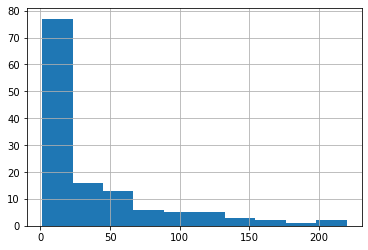

In [43]:
df_rice.co2.hist()

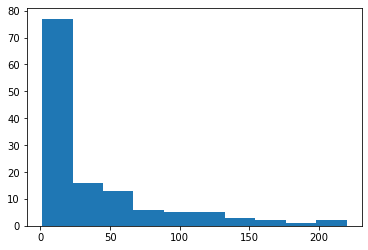

In [44]:
# or
import matplotlib.pyplot as plt
values = plt.hist(df_rice.co2)

shape of the data is right skewed

### Q.4
Use .agg() to calculate the mean and median of co2_emission for rice.

In [45]:
df_rice.co2.agg(['mean', 'median'])

mean      37.591615
median    15.200000
Name: co2, dtype: float64

# Measure of Spread

#### Spread shows us how spread apart of close to gether the data points are 
- Differnts measures to quantify the spread of datpoints are
##### > Variance: Average distance from each data point to the data's mean
<img src="variance.png">
>> <code>var= np.var(df['col'], ddof=1) </code>
>> Without ddof=1 , population variance is calculated instead of sample variance
  
#### > Standard Deviation : is square root of variance
>> <code> np.sqrt(np.var(df['col'], ddof=1)) OR np.std(df[col], ddof = 1)) </code>
#### >Mean absolute deviation (MAD): like SD to calculate MAD we should take distance from the mean for each data point but instead of sum of squre of the distance we sum absolute value of distance 
>> Standard deviation squares distances, penalizing longer distances more than shorter ones.
>> AMD penalizes each distance equally.
>> SD is more common than AMD
#### > Quantiles: q-quantiles are values that partition a finite set of values into q subsets of (nearly) equal sizes. There are q − 1 partitions of the q-quantiles, one for each integer k satisfying 0 < k < q
>> <code> np.quantile(df['col'], q) </code>
#### >Interquartile range (IQR): Height of the box in a boxplot , In descriptive statistics, the interquartile range tells you the spread of the middle half of your distribution. Quartiles segment any distribution that’s ordered from low to high into four equal parts. The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.
>><code>from scipy.stats import iqr
iqr = iqr(msleep['bodywt'])</code>
<img src = "iqr_quartiles.png">
#### > Outliers:  data point that is substantially diferent from the others
>> A data point is an outlier if:data < Q1 − 1.5 × IQR or data > Q3 + 1.5 × IQR  
>> <code> lower_threshold = np.quantile(df['col'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(df['col'], 0.75) + 1.5 * iqr 
df[(df['col'] < lower_threshold) | df['col'] > upper_threshold)] </code>



### Q1: 
- Calculate the quartiles of the co2_emission column of food_consumption
- Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption
- Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

In [46]:
df_clean.head()

,Country,food_category,consumption,co2
0,Argentina,Pork,10.51,37.20
1,Australia,Pork,24.14,85.44
2,Albania,Pork,10.88,38.51
3,Iceland,Pork,21.69,76.77
4,New Zealand,Pork,22.29,78.90


In [47]:
# quartiles of the co2_emission
np.quantile (df_clean['co2'], [0,.25,.5,.75,1])

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [48]:
# six quantiles
np.quantile (df_clean['co2'], np.linspace(0,1,6))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [49]:
# eleven quantiles
np.quantile (df_clean['co2'], np.linspace(0,1,11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

### Q2:
- Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.
- Create a histogram of co2_emission for the beef food_category .
- Create a histogram of co2_emission for the eggs food_category.

In [50]:
# variance and standard deviation of co2_emission for each food_category by grouping and aggregating
df_clean.groupby(['food_category'])['co2'].agg(['var', 'std'])

,var,std
food_category,,
Beef,88748.408132,297.906710
Eggs,21.371819,4.622966
Fish,921.637349,30.358481
Lamb & Goat,16475.518363,128.356996
Milk - inc. Cheese,17671.891985,132.935669
Nuts inc. Peanut Butter,35.639652,5.969895
Pork,3094.963537,55.632396
Poultry,245.026801,15.653332
Rice,2281.376243,47.763754


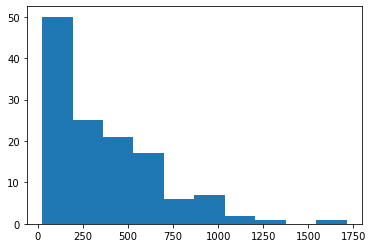

In [51]:
# Create a histogram of co2_emission for the Beef food_category
prob = plt.hist(df_clean[df_clean['food_category'] == 'Beef'].co2)

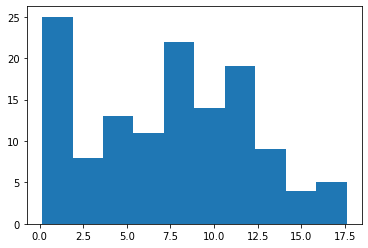

In [52]:
# Create a histogram of co2_emission for the Eggs food_category
prob = plt.hist(df_clean[df_clean['food_category'] == 'Eggs'].co2)

### Q3
- Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country
- Calculate the interquartile range of emissions_by_country

In [53]:
emissions_by_country = pd.DataFrame(df_clean.groupby(['Country'])['co2'].sum())

In [54]:
# Calculate the interquartile range of emissions_by_country 
quartiles  = np.quantile(emissions_by_country, np.linspace(0,1,5))
q1 = quartiles[1]
q3  = quartiles[3]
iqr = q3-q1


In [55]:
quartiles

array([ 141.4   ,  446.66  ,  685.9   , 1111.1525, 2172.4   ])

In [56]:
iqr

664.4925000000001

In [57]:
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [58]:
outliers  = emissions_by_country[(emissions_by_country.values< lower) | (emissions_by_country.values>upper) ]
outliers

,co2
Country,
Argentina,2172.4
